# Exploratory Data Analysis

This notebook will be used to explore and better visualize the Airbnb data provided for the assignment.

## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
from utils import *

## Detailing the Data Content

In [2]:
df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

In [3]:
df_train.duplicated().sum()

0

In [4]:
df_train.dtypes

property_id                   int64
property_name                object
property_summary             object
property_space               object
property_desc                object
property_neighborhood        object
property_notes               object
property_transit             object
property_access              object
property_interaction         object
property_rules               object
property_zipcode             object
property_lat                float64
property_lon                float64
property_type                object
property_room_type           object
property_max_guests           int64
property_bathrooms          float64
property_bedrooms           float64
property_beds               float64
property_bed_type            object
property_amenities           object
property_sqfeet             float64
property_scraped_at          object
property_last_updated        object
host_id                       int64
host_since                   object
host_location               

In [5]:
df_train.isna().sum()

property_id                    0
property_name                 24
property_summary             212
property_space              2309
property_desc                  3
property_neighborhood       2811
property_notes              4522
property_transit            2580
property_access             3135
property_interaction        3404
property_rules              3169
property_zipcode             134
property_lat                   0
property_lon                   0
property_type                  0
property_room_type             0
property_max_guests            0
property_bathrooms            12
property_bedrooms              9
property_beds                 11
property_bed_type              0
property_amenities            52
property_sqfeet             6333
property_scraped_at            0
property_last_updated          0
host_id                        0
host_since                     1
host_location                 33
host_about                  3107
host_response_time          1461
host_respo

## Importing the train and test data

In [6]:
df_train.columns

Index(['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'property_zipcode', 'property_lat', 'property_lon',
       'property_type', 'property_room_type', 'property_max_guests',
       'property_bathrooms', 'property_bedrooms', 'property_beds',
       'property_bed_type', 'property_amenities', 'property_sqfeet',
       'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_nr_listings', 'host_nr_listings_total',
       'host_verified', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'booking_cancel_policy', 'reviews_num',
       'reviews_first', 're

C:\Users\guibl\AppData\Local\Temp\ipykernel_45116\2136098350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")


<Axes: >

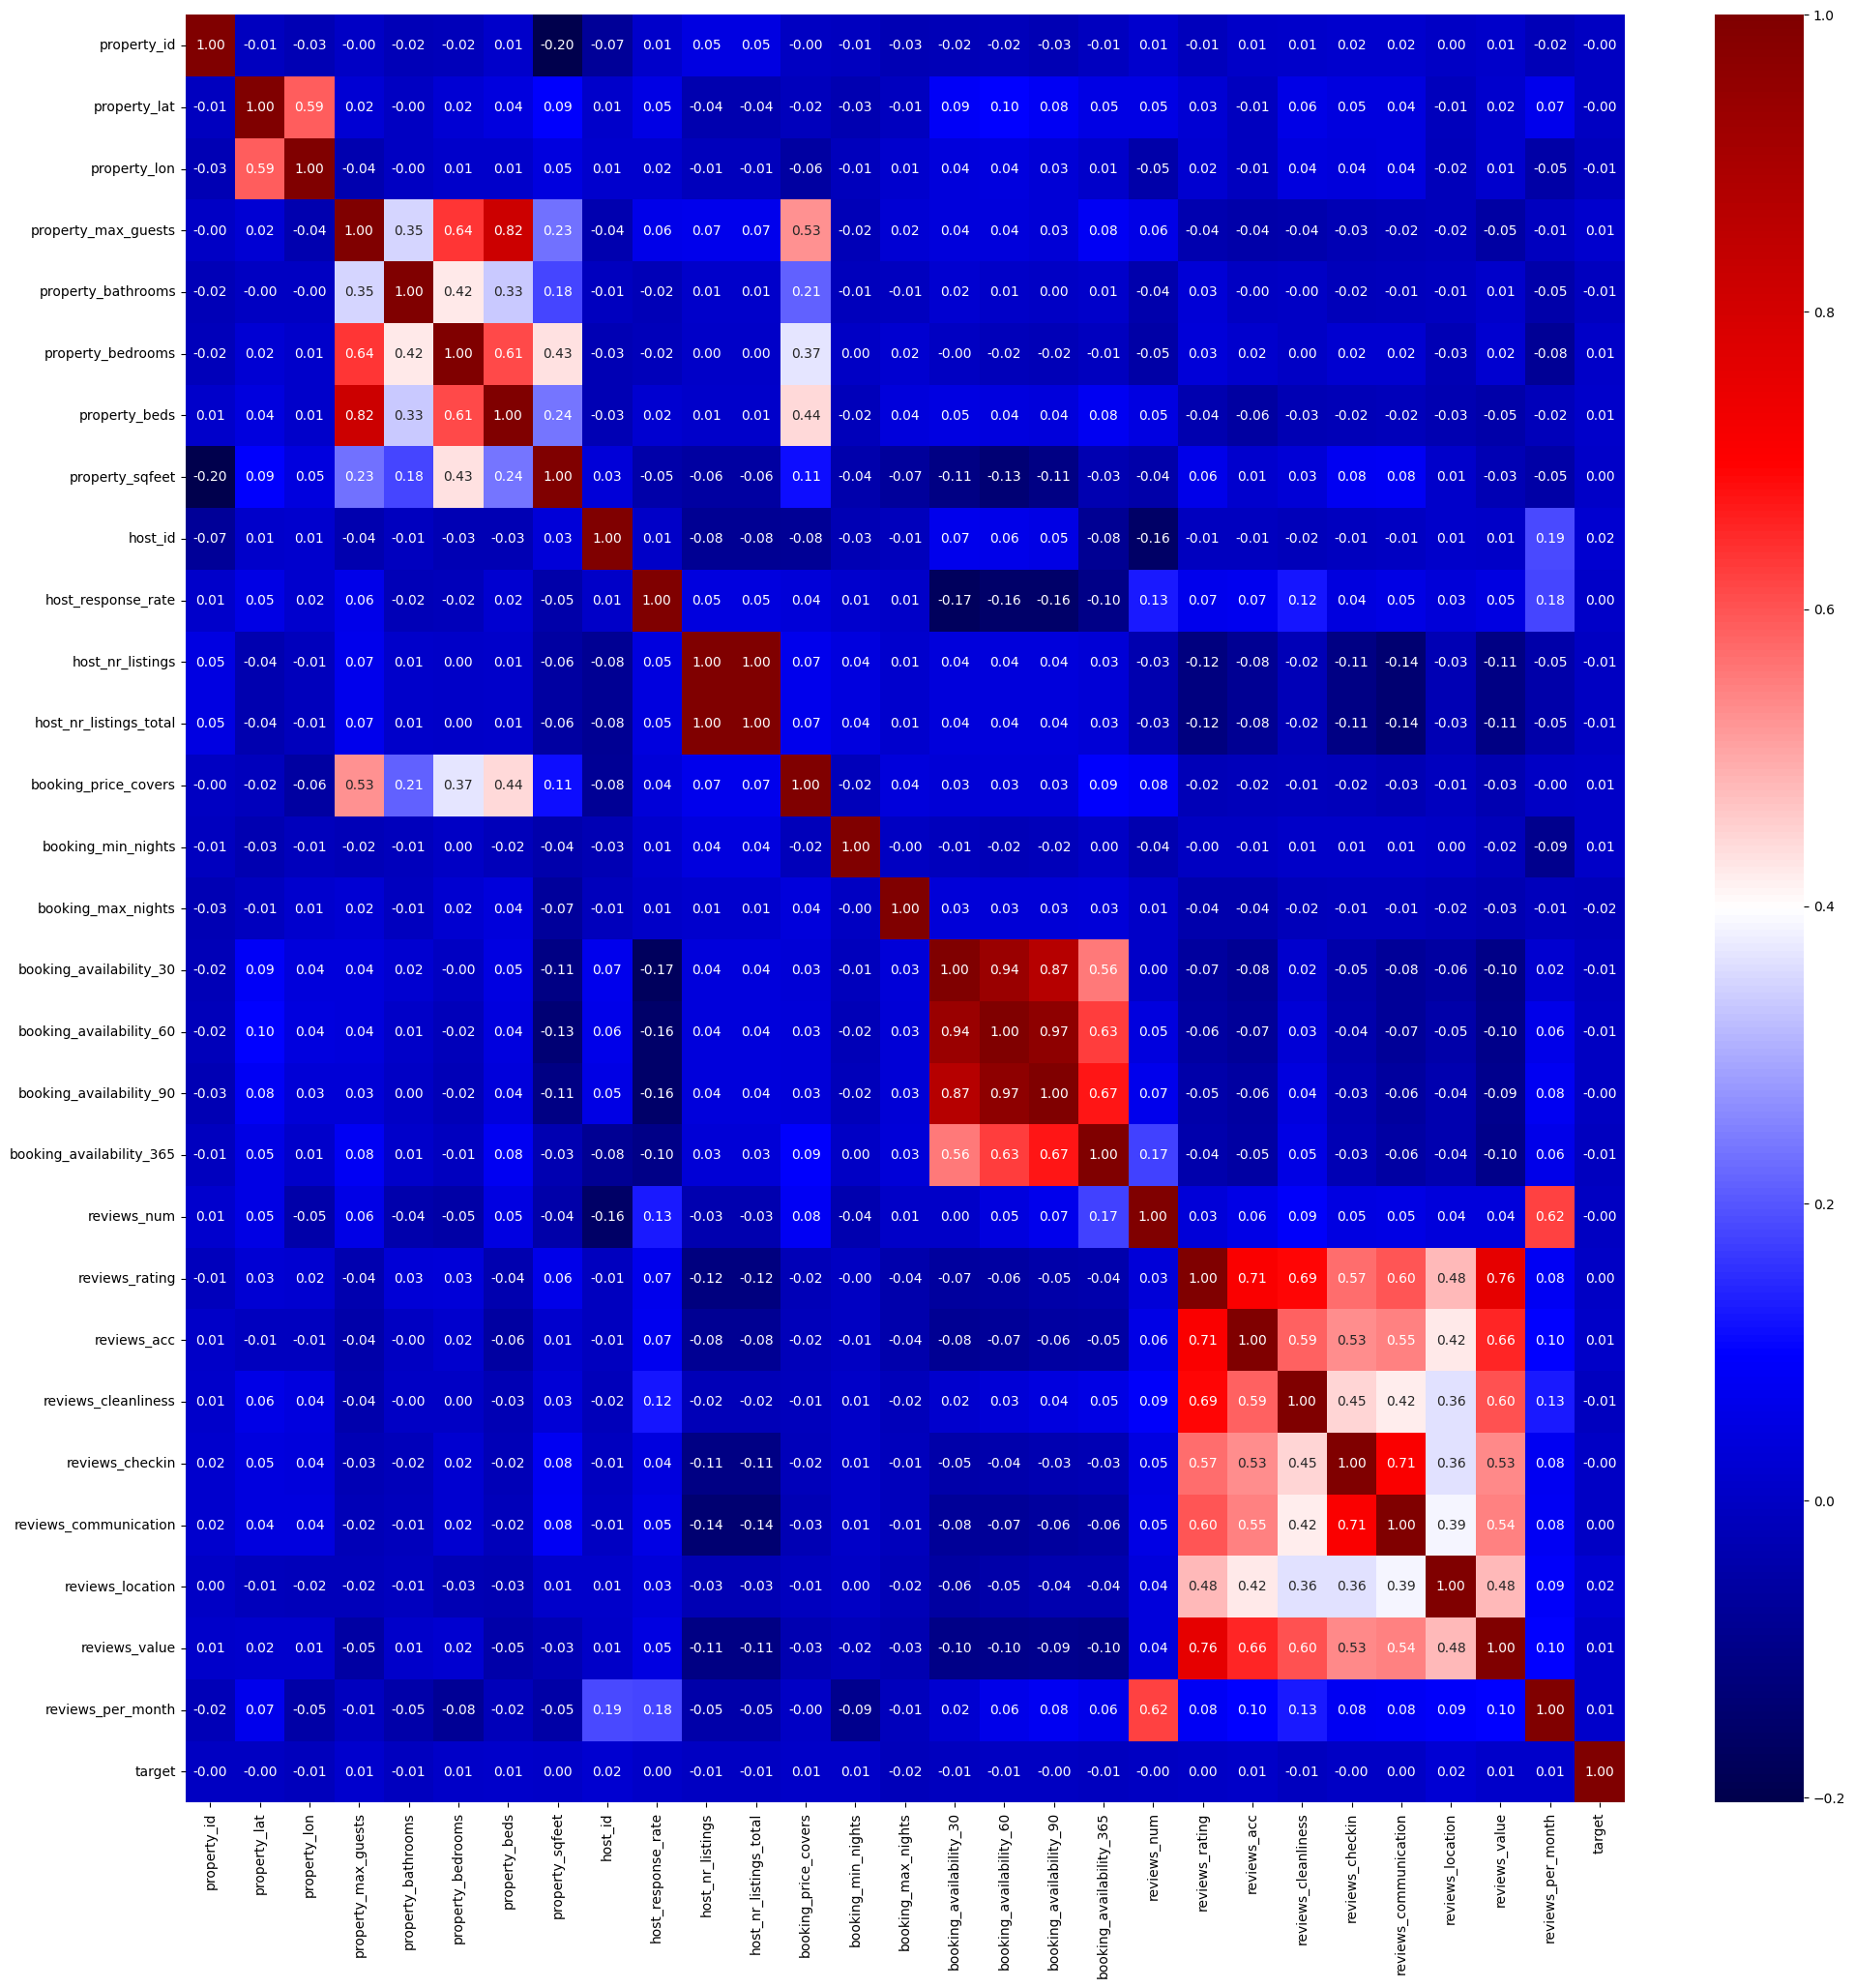

In [7]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")

---
## Analysing the Target Variable

We will check the distribution of the target variable to determine the best transformation for it, if a transformation is necessary.

<Axes: xlabel='target', ylabel='Count'>

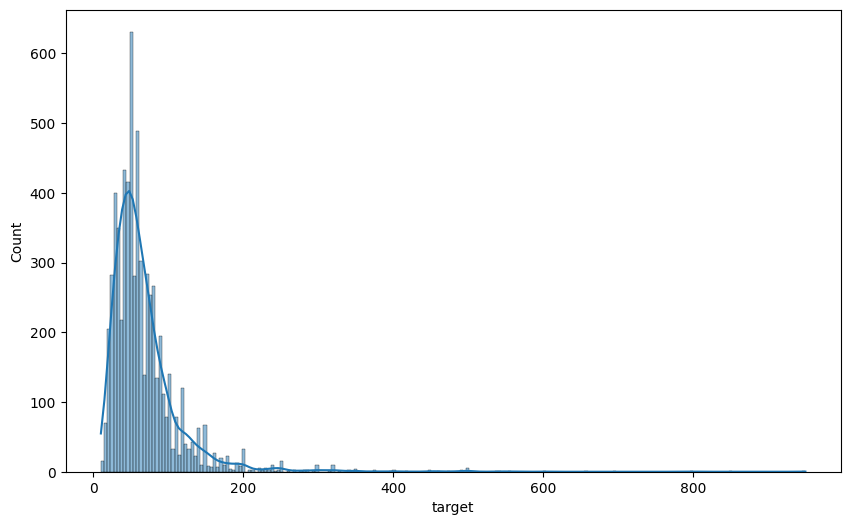

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(x='target', data=df_train, kde=True)

In [9]:
df_train[['target']].describe()

target
count  6495.000000
mean     67.899923
std      51.910478
min      10.000000
25%      40.000000
50%      55.000000
75%      80.000000
max     950.000000

As it can be seen, the target data is still skewed to the left, so a transformation is appropriate. In this case, a log transformation should unskew the data distribution, so it will be applied.

In [10]:
df_train['target_log'] = np.log(df_train['target'])

<Axes: xlabel='target_log', ylabel='Count'>

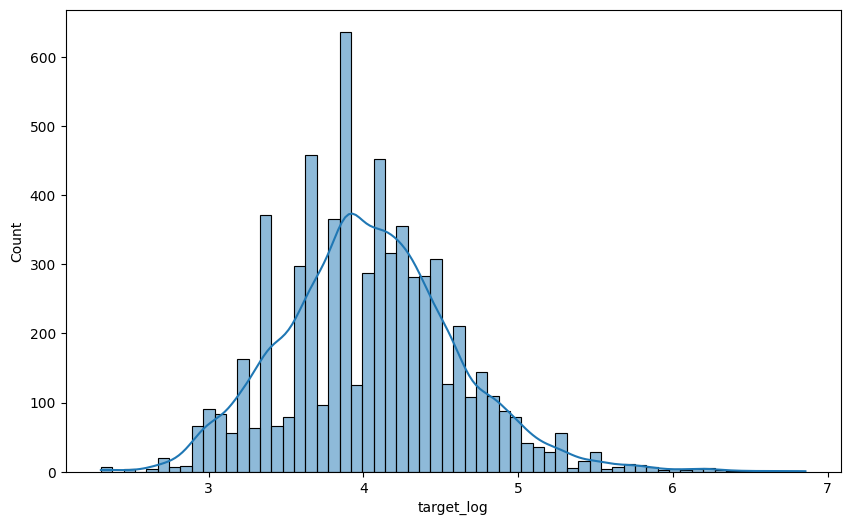

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x='target_log', data=df_train, kde=True)

In [12]:
df_train[['target_log']].describe()

target_log
count  6495.000000
mean      4.044467
std       0.561034
min       2.302585
25%       3.688879
50%       4.007333
75%       4.382027
max       6.856462

<Axes: xlabel='target_log'>

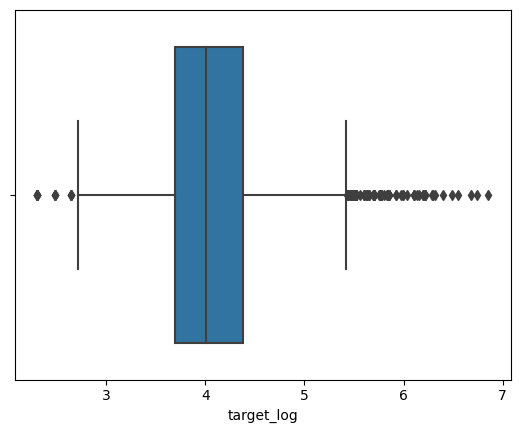

In [13]:
sns.boxplot(data=df_train, x='target_log')

In [14]:
np.percentile(df_train.target_log, q=99.5)

5.8289456176102075

In [15]:
scaler = StandardScaler()

In [16]:
df_train['target_std_log'] = scaler.fit_transform(df_train[['target_log']])

<Axes: xlabel='target_std_log', ylabel='Count'>

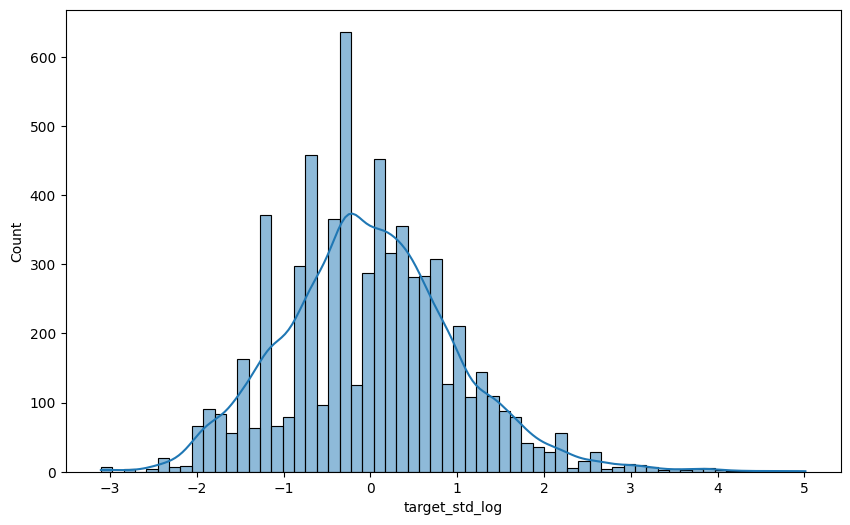

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x='target_std_log', data=df_train, kde=True)

C:\Users\guibl\AppData\Local\Temp\ipykernel_45116\2136098350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")


<Axes: >

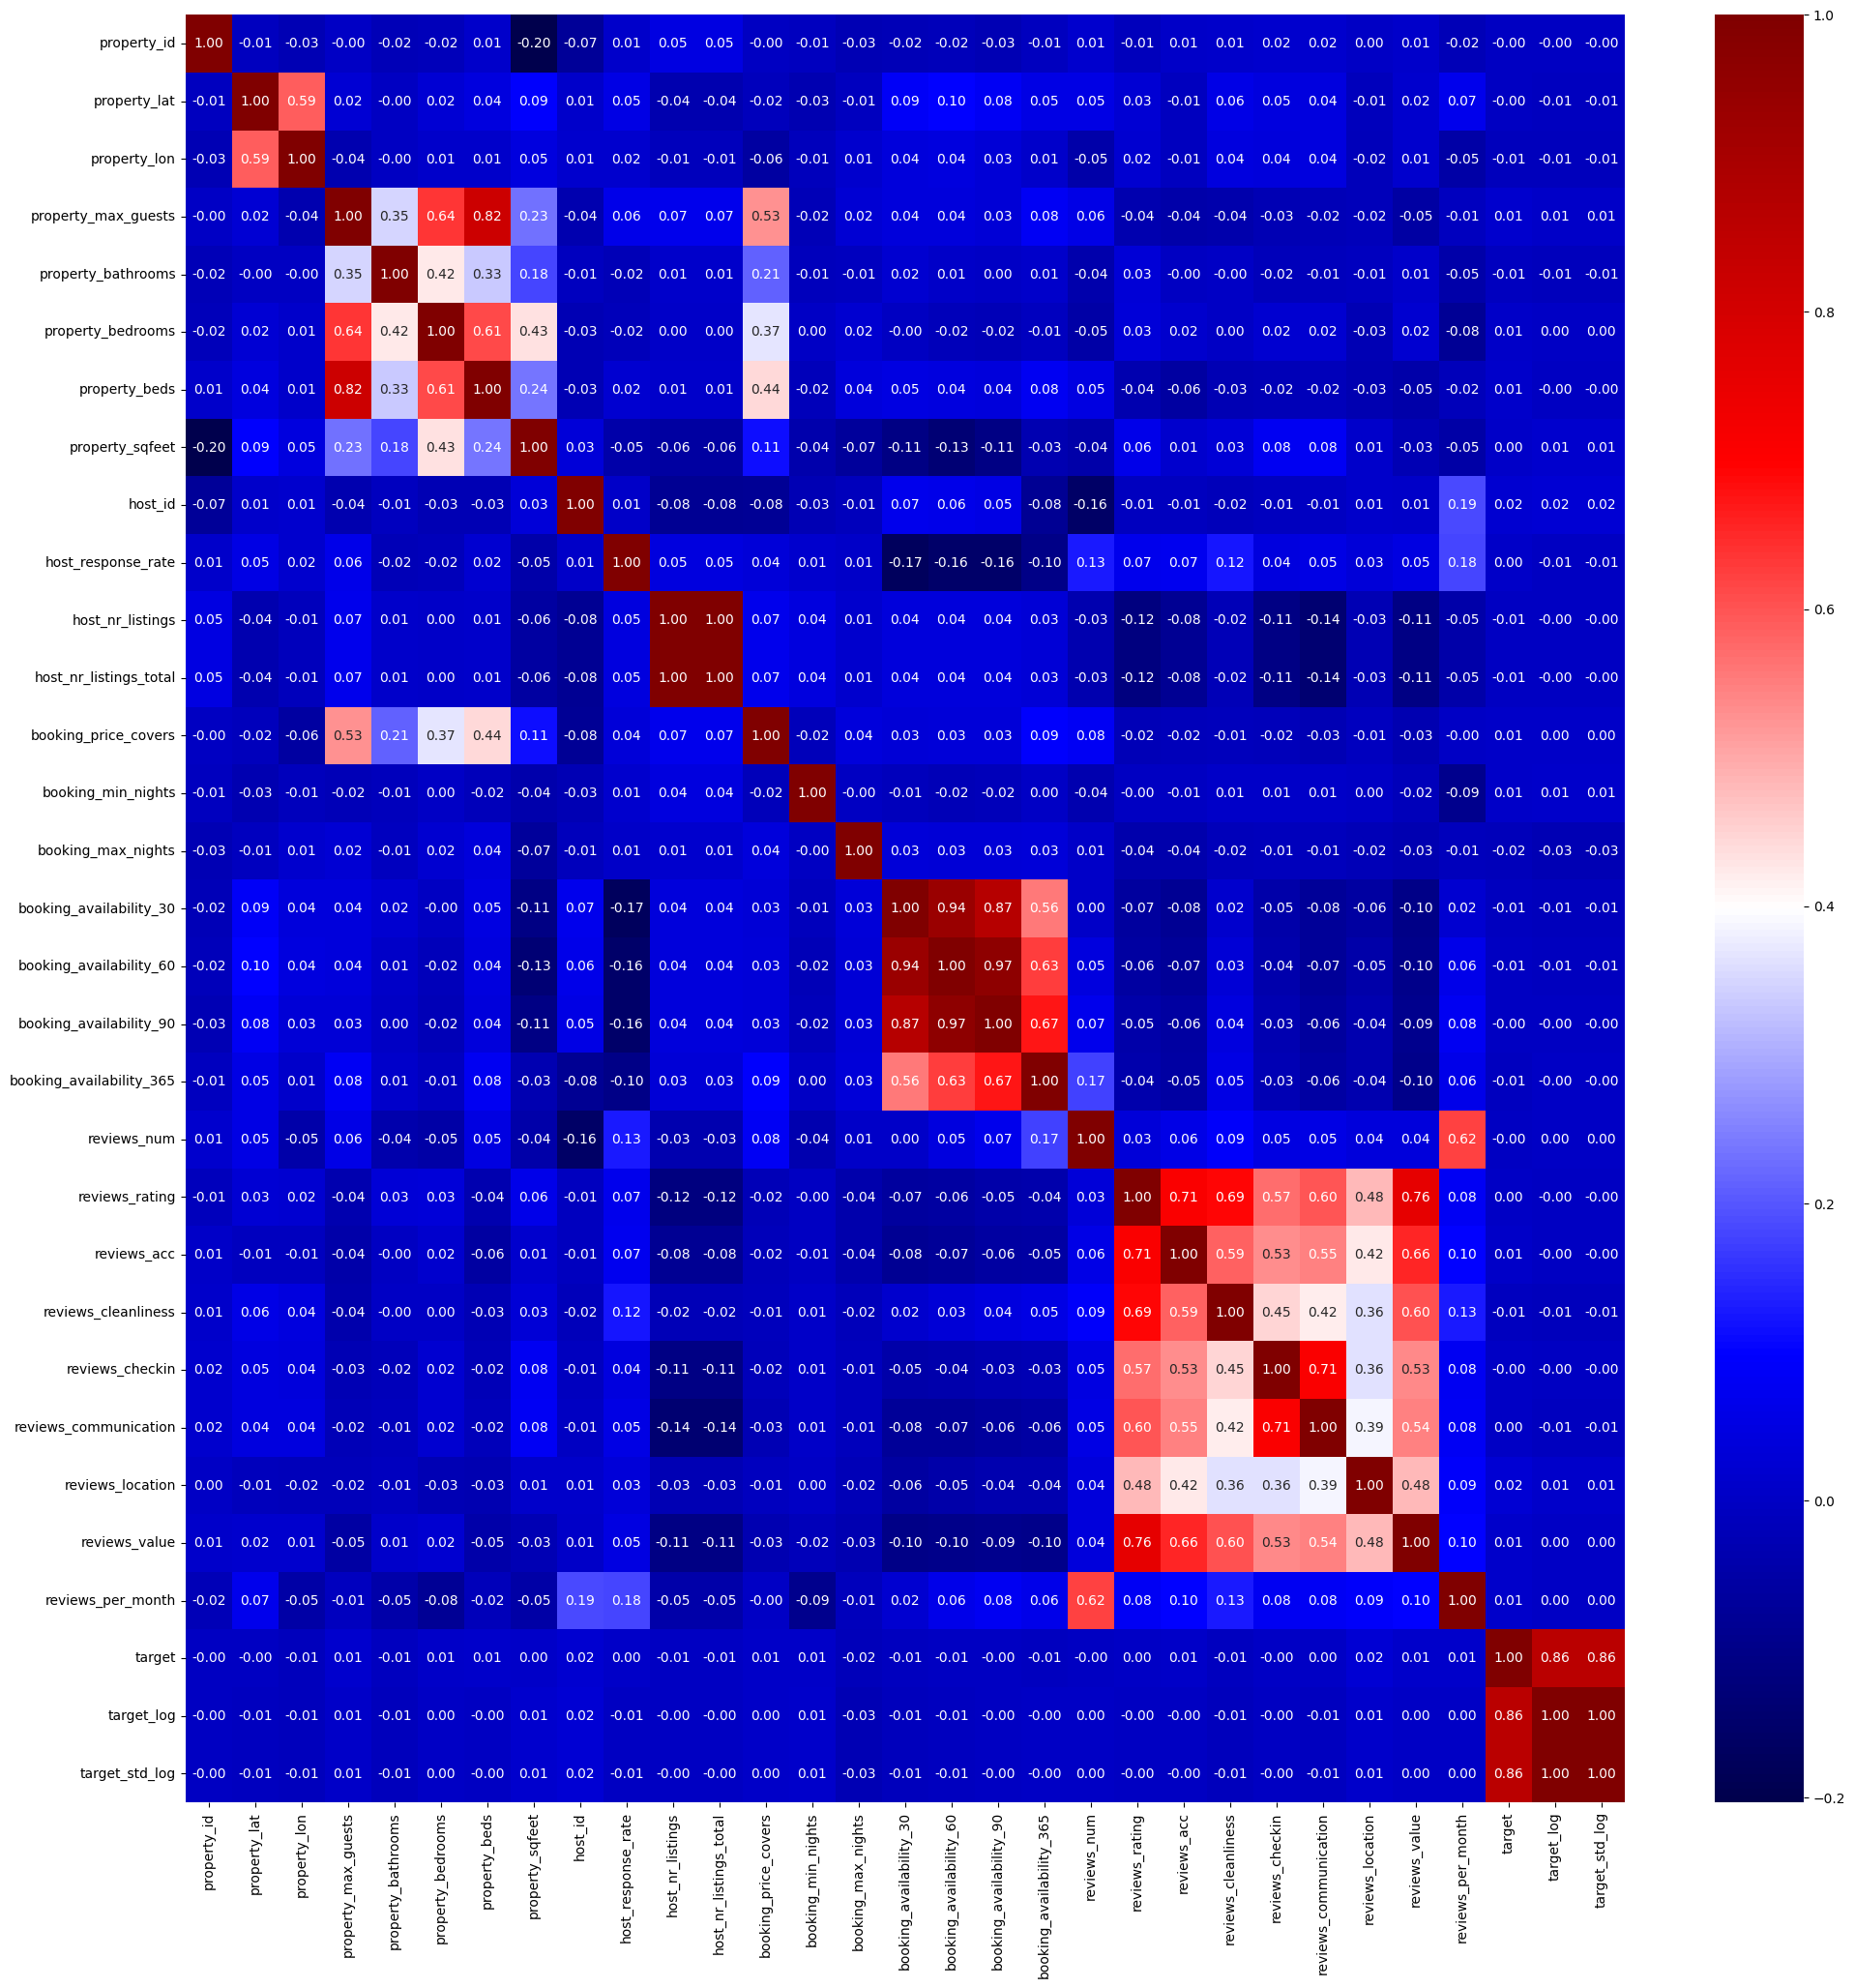

In [18]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")

For this case, the target variable will be log transformed in order to remove skewness, and standardized so that some models can have a better performance with the prediction.

---
## Property Beds, Max Guests, Bedrooms and Bathrooms 

In [19]:
df_train.property_beds.value_counts()

1.0     3793
2.0     1648
3.0      563
4.0      260
5.0       91
6.0       66
8.0       24
7.0       14
16.0      13
9.0        4
13.0       3
10.0       2
12.0       2
14.0       1
Name: property_beds, dtype: int64

<Axes: xlabel='property_beds'>

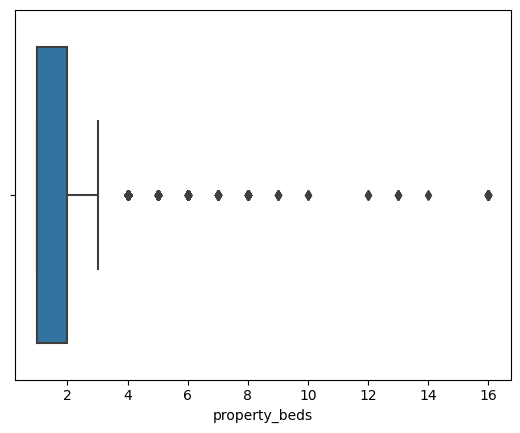

In [20]:
sns.boxplot(data=df_train, x='property_beds')

<Axes: xlabel='property_beds', ylabel='target_log'>

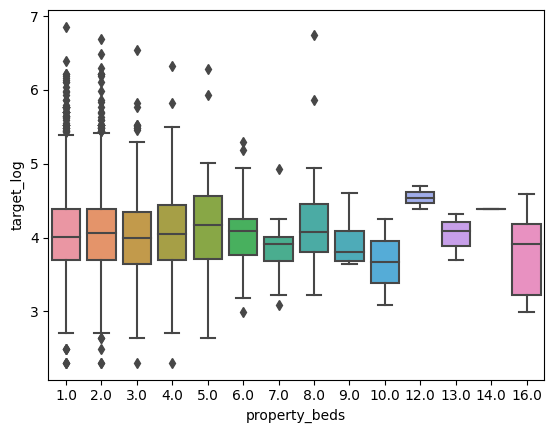

In [21]:
sns.boxplot(data=df_train, x='property_beds', y='target_log')

In [22]:
(df_train.property_beds > 8).sum()#/df_train.shape[0]

25

In [23]:
df_train.property_max_guests.value_counts()

2     3238
4     1326
3      613
1      488
6      348
5      280
8       66
7       58
10      26
16      25
9       12
12      11
11       2
13       1
15       1
Name: property_max_guests, dtype: int64

<Axes: xlabel='property_max_guests'>

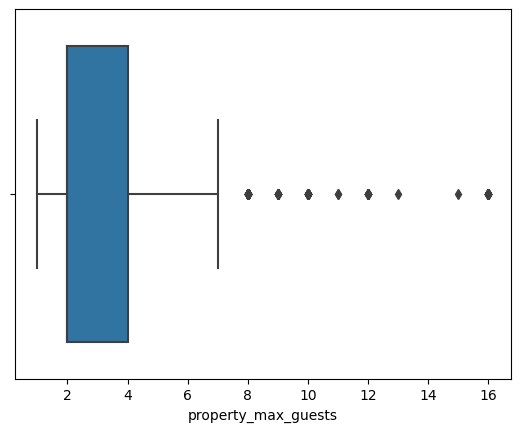

In [24]:
sns.boxplot(data=df_train, x='property_max_guests')

<Axes: xlabel='property_max_guests', ylabel='target'>

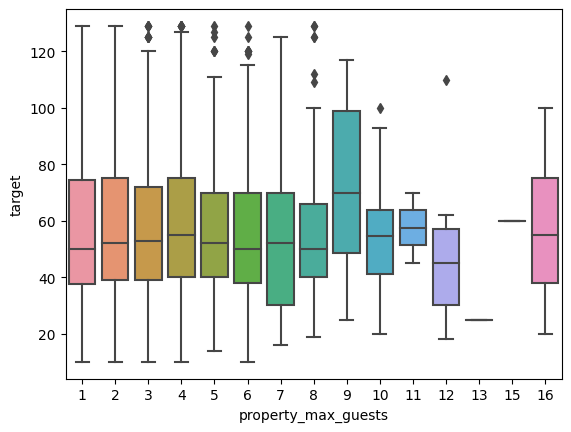

In [25]:
sns.boxplot(data=df_train[df_train.target < 130], x='property_max_guests', y='target')

<Axes: xlabel='property_beds', ylabel='property_max_guests'>

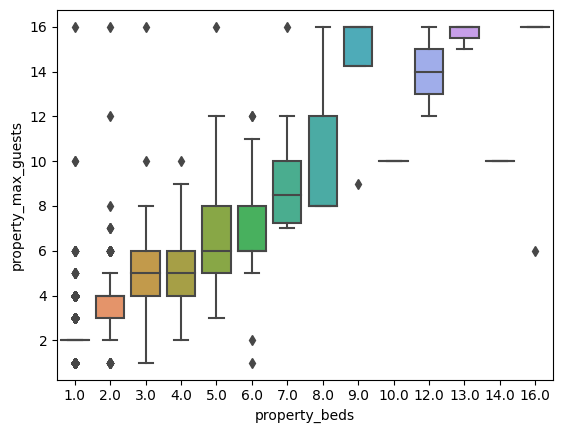

In [26]:
sns.boxplot(data=df_train, x='property_beds', y='property_max_guests')

In [27]:
df_train.property_max_guests.value_counts()

2     3238
4     1326
3      613
1      488
6      348
5      280
8       66
7       58
10      26
16      25
9       12
12      11
11       2
13       1
15       1
Name: property_max_guests, dtype: int64

In [28]:
(df_train.property_max_guests > 8).sum()/df_train.shape[0]

0.012009237875288684

In [29]:
df_train.property_bedrooms.value_counts()

1.0    4477
2.0    1081
0.0     583
3.0     244
4.0      71
5.0      19
6.0       7
8.0       2
7.0       2
Name: property_bedrooms, dtype: int64

<Axes: xlabel='property_bedrooms'>

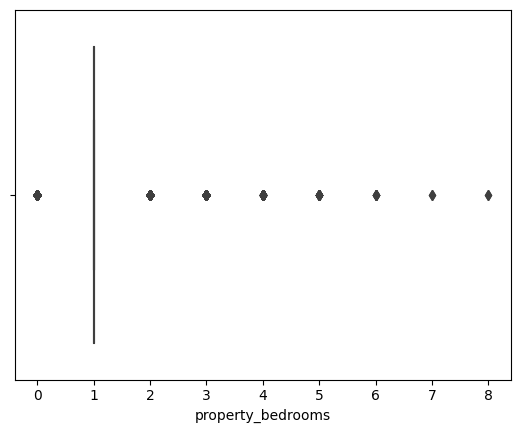

In [30]:
sns.boxplot(data=df_train, x='property_bedrooms')

<Axes: xlabel='property_bedrooms', ylabel='target_log'>

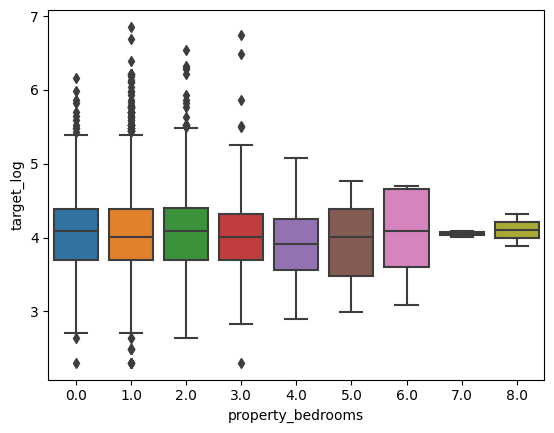

In [31]:
sns.boxplot(data=df_train, x='property_bedrooms', y='target_log')

In [32]:
df_train.property_bathrooms.value_counts()

1.0    5348
1.5     480
2.0     459
0.5      75
2.5      45
3.0      34
0.0      11
4.0       9
3.5       7
8.0       5
5.5       4
7.0       3
5.0       2
7.5       1
Name: property_bathrooms, dtype: int64

<Axes: xlabel='property_bathrooms'>

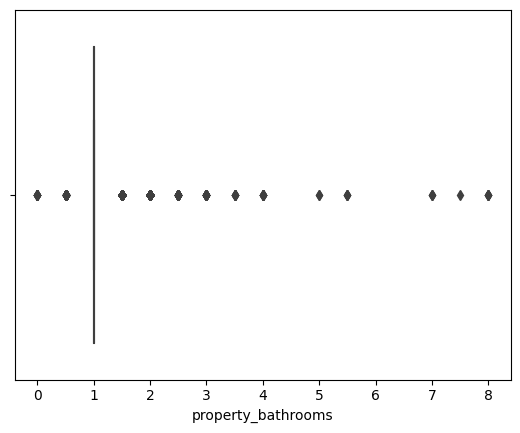

In [33]:
sns.boxplot(data=df_train, x='property_bathrooms')

<Axes: xlabel='property_bathrooms', ylabel='target_log'>

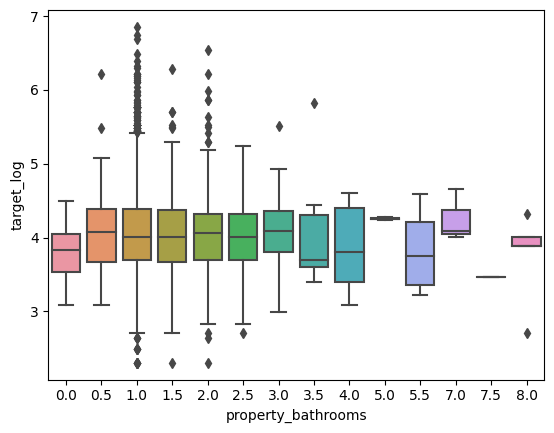

In [34]:
sns.boxplot(data=df_train, x='property_bathrooms', y='target_log')

---
## Check the number of clusters for the location

In [35]:
from utils.transformers import KMeansClusterer
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='property_lon', ylabel='property_lat'>

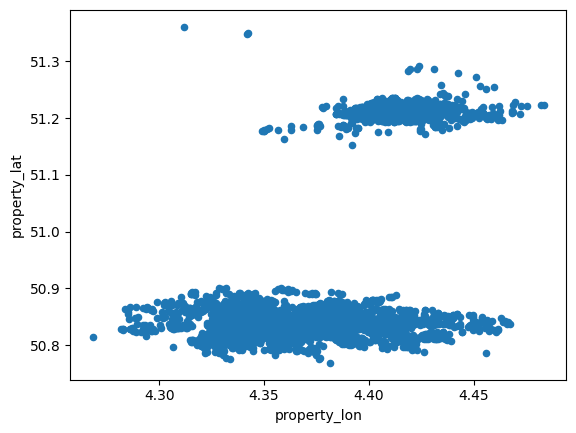

In [36]:
df_train.plot(x='property_lon', y='property_lat', kind='scatter')

In [37]:
lat = df_train['property_lat']

lon = df_train['property_lon']

In [38]:
clust = KMeansClusterer(
    n_clusters=7,
    features_cluster=['property_lat', 'property_lon'],
    initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ]))

In [39]:
df_temp_kmeans = df_train[['property_lat', 'property_lon']].copy()
zone_kmeans = clust.fit_transform(df_temp_kmeans)

In [40]:
from utils.transformers import GaussianClusterer
clust_gauss = GaussianClusterer(
    n_clusters=7,
    features_cluster=['property_lat', 'property_lon'],
    initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ]))

In [41]:
df_temp_gauss = df_train[['property_lat', 'property_lon']].copy()
zones_gauss = clust_gauss.fit_transform(df_temp_gauss)

Text(0.5, 1.0, '7 Clusters with Kmeans')

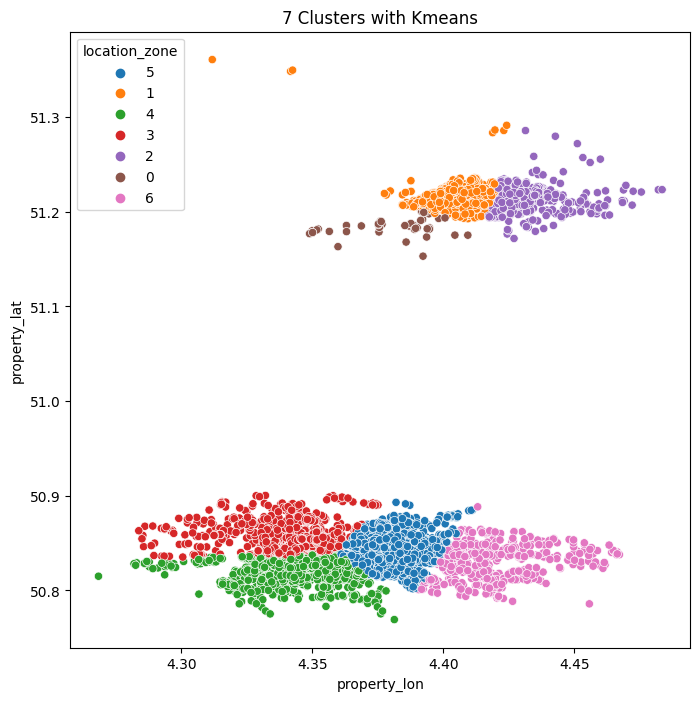

In [42]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=lon, y=lat, hue=zone_kmeans['location_zone'])
plt.title('7 Clusters with Kmeans')

Text(0.5, 1.0, '7 Clusters with Gaussian Mixture Model')

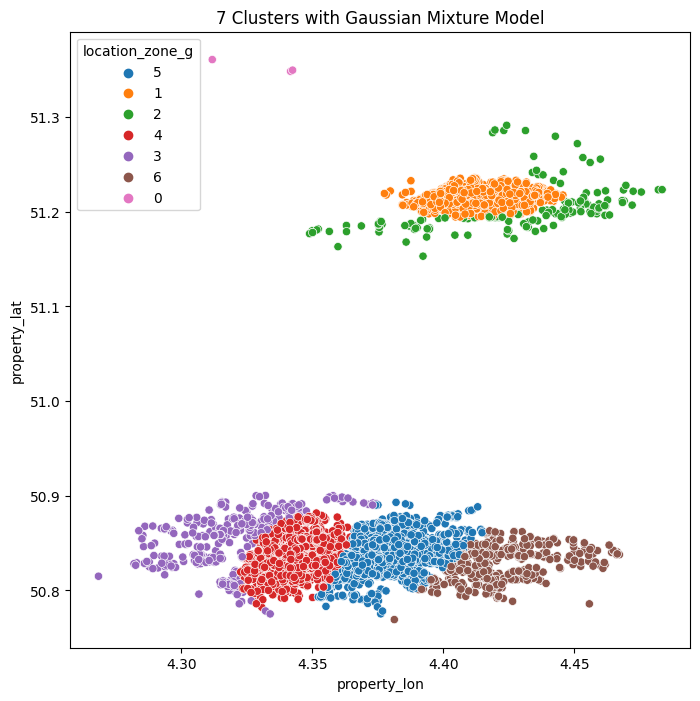

In [43]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=lon, y=lat, hue=zones_gauss['location_zone_g'])
plt.title('7 Clusters with Gaussian Mixture Model')

The idea behind this clustering is to separate the locations in different categorical zones. It is known that places closer to the city centers will generally be more expensive than ones that are further away, so the idea was to create clusters that would separate between closer and further from the center. We tested two approaches, using a Kmeans model and a Gaussian Mixture model. The number of clusters were chosen based on the idea explained above, after observing the distribution of the Airbnbs. The initial positions of the centroids were chosen by us so the model could better capture the separation between center and suburb.

From the two plots, it can be seen that the Gaussian Mixture model better separates between city center and further away, so it will be chosen over the Kmeans model.

---
## Check the Categorical features after the initial preprocessing steps for the reviews features

In this part we will apply all the feature transformers until the encoders, and check the remaining categorical features to determine the best way to handle the enconding procedure for each.

In [44]:
from sklearn.pipeline import Pipeline
from utils.transformers import *

In [45]:
pipe = Pipeline(steps=[
    ('host_verified_counter',
     HostVerificationsCounter()
     ),
    ('extras_handler',
     ExtrasHandler()
     ),
    ('clust_location',
     GaussianClusterer(
        n_clusters=7,
        features_cluster=['property_lat', 'property_lon'],
        initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ])
     ))
])

In [46]:
df_train_check = pipe.fit_transform(df_train)

In [47]:
df_train_check

property_id                                    property_name  \
0               1                    Chambre à louer,courte durée.   
1               2  Urban Antwerp - Spacious & Authentic Herenhouse   
2               3   comfortable apartment in friendly neighborhood   
3               4                         Historical City Antwerp.   
4               5                              Antwerp center city   
...           ...                                              ...   
6490         6496       Grand appartement Saint Gilles avec balcon   
6491         6497              Chambre cosy dans une grande maison   
6492         6498                      Comfy room in spacious loft   
6493         6499                      Top floor room. Big & sunny   
6494         6500                           house near city centre   

                                       property_summary  \
0     Je loue une chambre dans mon appartement "atyp...   
1     Our place is a typical historic herenhuis clos...   
2     Nice and cozy apartment for couples who like t...   
3     The best place to stay if you like to be in th...   
4     Our place is right in the heart of the histori...   
...                                                 ...   
6490  Photos de l'appartement sur demande, merci Peu...   
6491                                                NaN   
6492  Spacious, modern apartment in industrial build...   
6493  We rent out our biggest room. It has a very co...   
6494  While we are travelling, we rent out our entir...   

                                         property_space  \
0     Espace duplex très grand et lumineux,la chambr...   
1     The spaces in our house are all large with hig...   
2     Nice proper and clean apartment. No personal s...   
3     Our rooms are nice and spacious. You stay in a...   
4     It is situated in the center if the old town. ...   
...                                                 ...   
6490  Balcon, grande cuisine et chambre privée avec ...   
6491  Grande maison sur 4 étages dans un quartier ca...   
6492  Bright loft in industrial building   Comfortab...   
6493  The room is big, and the private terras makes ...   
6494  The house is a typical (ugly) house from the 7...   

                                          property_desc  \
0     Je loue une chambre dans mon appartement "atyp...   
1     Our place is a typical historic herenhuis clos...   
2     Nice and cozy apartment for couples who like t...   
3     The best place to stay if you like to be in th...   
4     Our place is right in the heart of the histori...   
...                                                 ...   
6490  Photos de l'appartement sur demande, merci Peu...   
6491  Grande maison sur 4 étages dans un quartier ca...   
6492  Spacious, modern apartment in industrial build...   
6493  We rent out our biggest room. It has a very co...   
6494  While we are travelling, we rent out our entir...   

                                  property_neighborhood  \
0                                                   NaN   
1     Bar and restaurants One of our favourite bars ...   
2     Op 5 minuten lopen zijn er 2 gezellig stadpark...   
3       In the middle of the historical city of Antwerp   
4     The neighborhood is in the historical part of ...   
...                                                 ...   
6490                         L'esprit familial et calme   
6491  Tout est disponible à proximité, beaucoup de c...   
6492  Upcoming neighborhood. 1-minute walk from the ...   
6493  Great neighbourhood, calm area and close to ce...   
6494                Restaurants Bars Big park Good vibe   

                                         property_notes  \
0                                                   NaN   
1                                                   NaN   
2     Public transport is next to the apartment and ...   
3     Staying in our house you have to be able to cl...   
4                                 

In [48]:
df_train_check.isna().sum()

property_id                    0
property_name                 24
property_summary             212
property_space              2309
property_desc                  3
property_neighborhood       2811
property_notes              4522
property_transit            2580
property_access             3135
property_interaction        3404
property_rules              3169
property_zipcode             134
property_type                  0
property_room_type             0
property_max_guests            0
property_bathrooms            12
property_bedrooms              9
property_beds                 11
property_bed_type              0
property_amenities            52
property_sqfeet             6333
property_scraped_at            0
property_last_updated          0
host_id                        0
host_since                     1
host_location                 33
host_about                  3107
host_response_time          1461
host_response_rate          1461
host_nr_listings               1
host_nr_li

Categorical Features to Analyse:

- property_type
- property_room_type
- property_bed_type
- booking_cancel_policy
- location_zone_g

### Property Type

In [49]:
print(df_train_check['property_type'].value_counts().count())
df_train_check['property_type'].value_counts()

23


Apartment             4965
House                  888
Loft                   171
Bed & Breakfast        166
Townhouse              114
Condominium             78
Guesthouse              35
Other                   30
Villa                   19
Cabin                    7
Serviced apartment       4
Castle                   3
Dorm                     2
Guest suite              2
Hostel                   2
Boutique hotel           2
Earth House              1
Camper/RV                1
Yurt                     1
Chalet                   1
Boat                     1
Tent                     1
Timeshare                1
Name: property_type, dtype: int64

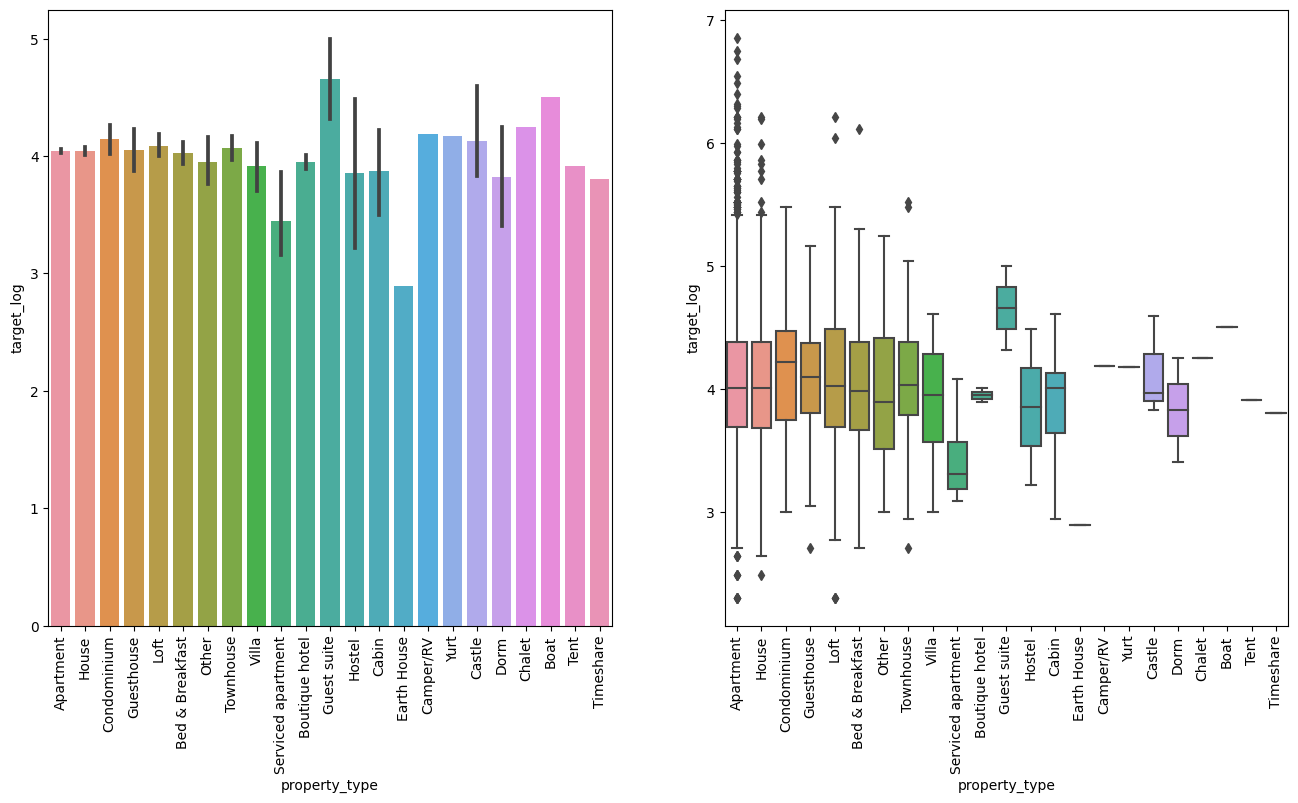

<Figure size 800x800 with 0 Axes>

In [50]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
plt.figure(figsize=(8,8))
sns.barplot(x="property_type", y="target_log", data=df_train_check, ax=ax1)
sns.boxplot(x="property_type", y="target_log", data=df_train_check, ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);

This feature has 23 different categories, but most of them have very little observations. Those observations have a high variance, and it's hard to determine their true influence on the target. The approach for this feature will be to group all the categories after 'condominium' into the 'other' category, and One Hot Encode the remaining ones. 

---
### Property Room Type

In [51]:
print(df_train_check['property_room_type'].value_counts().count())
df_train_check['property_room_type'].value_counts()

3


Entire home/apt    4224
Private room       2187
Shared room          84
Name: property_room_type, dtype: int64

<Axes: xlabel='property_room_type', ylabel='target_log'>

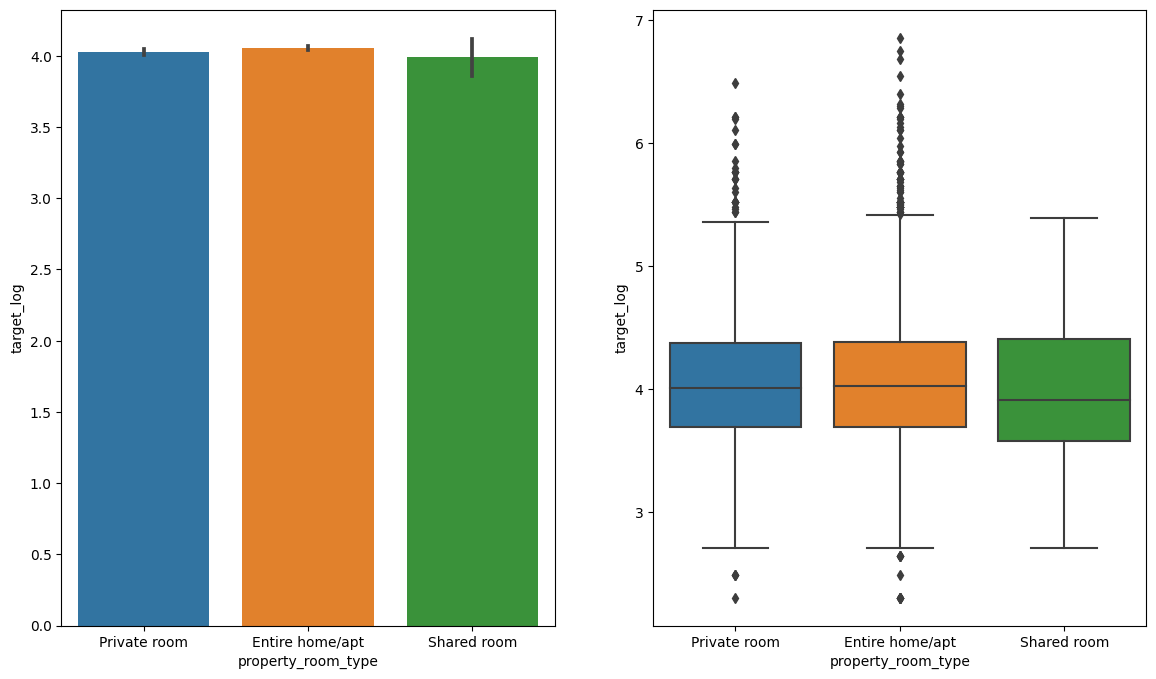

<Figure size 800x800 with 0 Axes>

In [52]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
plt.figure(figsize=(8,8))
sns.barplot(x="property_room_type", y="target_log", data=df_train_check, ax=ax1)
sns.boxplot(x="property_room_type", y="target_log", data=df_train_check, ax=ax2)

It can be seen a small difference in the average between the three room types, and that the private room and entire apartments have high outliers, which will be kept as they represent important observations (high-end apartments/houses).

For this feature, a simple One Hot Encoding should be enough, as there are only three categories.

---
### Property Bed Type

In [53]:
print(df_train_check['property_bed_type'].value_counts().count())
df_train_check['property_bed_type'].value_counts()

5


Real Bed         6281
Pull-out Sofa     151
Futon              35
Couch              23
Airbed              5
Name: property_bed_type, dtype: int64

<Axes: xlabel='property_bed_type', ylabel='target'>

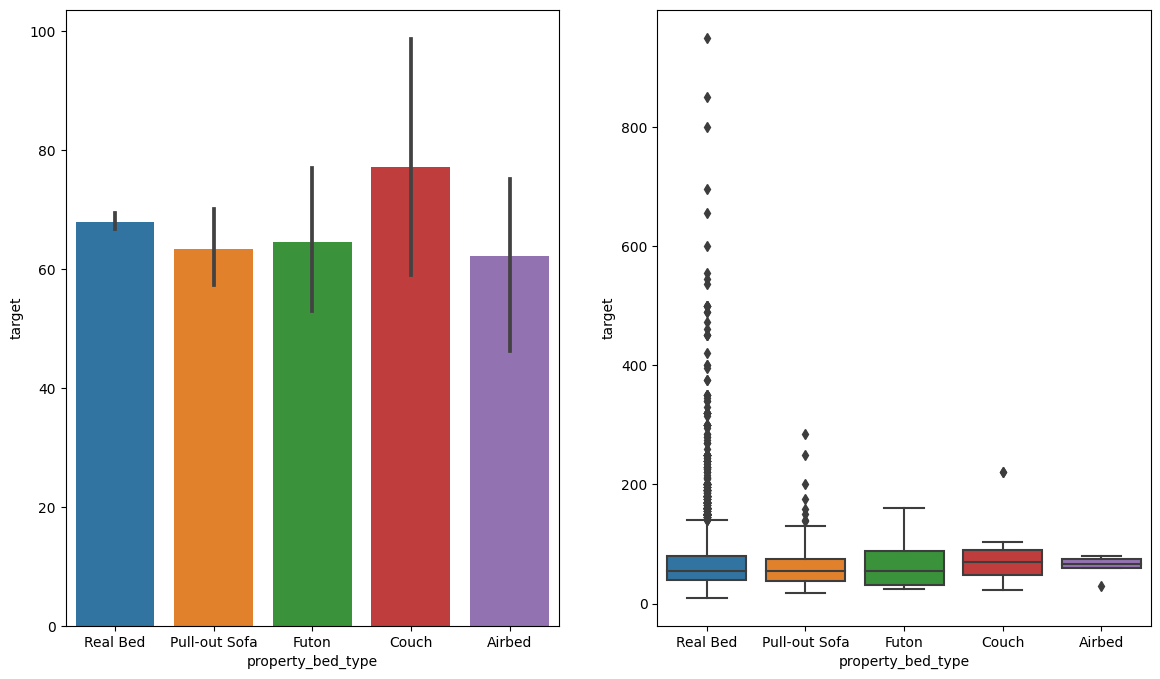

<Figure size 800x800 with 0 Axes>

In [54]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
plt.figure(figsize=(8,8))
sns.barplot(x="property_bed_type", y="target", data=df_train_check, ax=ax1)
sns.boxplot(x="property_bed_type", y="target", data=df_train_check, ax=ax2)

Since the dataset is highly unbalanced, with most of the observations being real bed, and there being some inconsistencies with this feature (like having some apartments labeled as entire homes with 3 beds and the bed type being couch), we believe it's best to remove this feature.

---
### Booking Cancel Policy

In [55]:
print(df_train_check['booking_cancel_policy'].value_counts().count())
df_train_check['booking_cancel_policy'].value_counts()

4


flexible           2737
moderate           2004
strict             1753
super_strict_30       1
Name: booking_cancel_policy, dtype: int64

<Axes: xlabel='booking_cancel_policy', ylabel='target_log'>

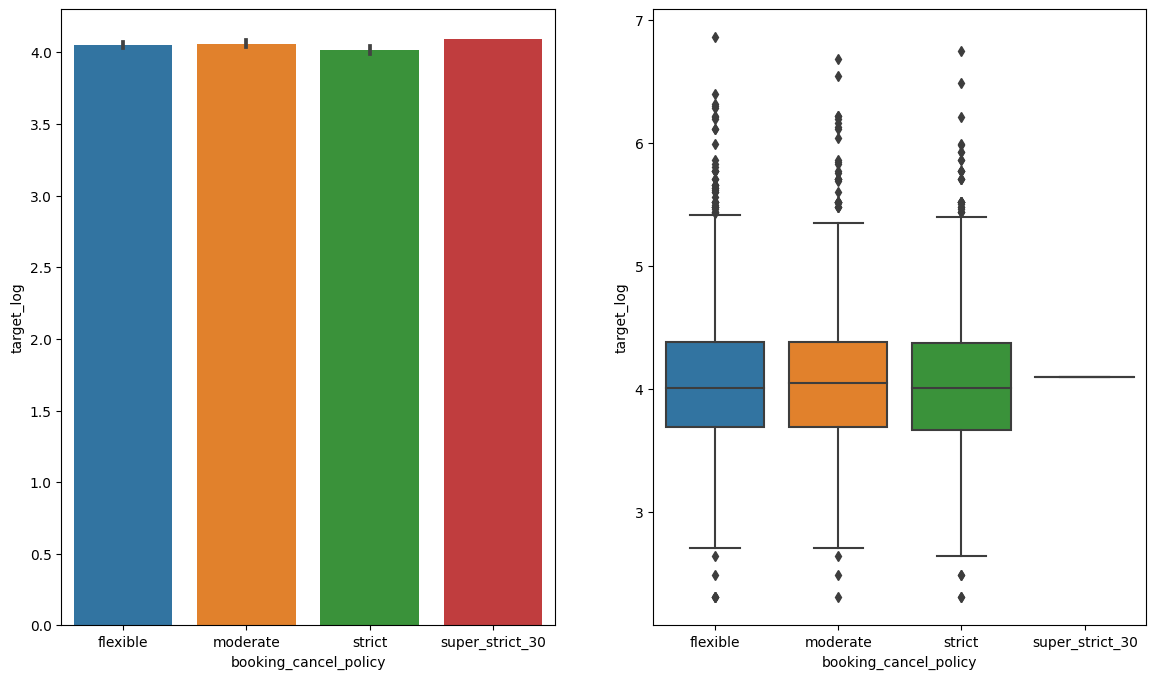

<Figure size 800x800 with 0 Axes>

In [56]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
plt.figure(figsize=(8,8))
sns.barplot(x="booking_cancel_policy", y="target_log", data=df_train_check, ax=ax1)
sns.boxplot(x="booking_cancel_policy", y="target_log", data=df_train_check, ax=ax2)

For this feature, since there is only one observation in the 'super_strict_30' category, it will be grouped together with the 'strict' category. After it, this variable will be one hot encoded.

---
### Location Zone

In [57]:
print(df_train_check['location_zone_g'].value_counts().count())
df_train_check['location_zone_g'].value_counts()

7


4    2564
5    2129
1     961
6     398
3     293
2     147
0       3
Name: location_zone_g, dtype: int64

<Axes: xlabel='location_zone_g', ylabel='target_log'>

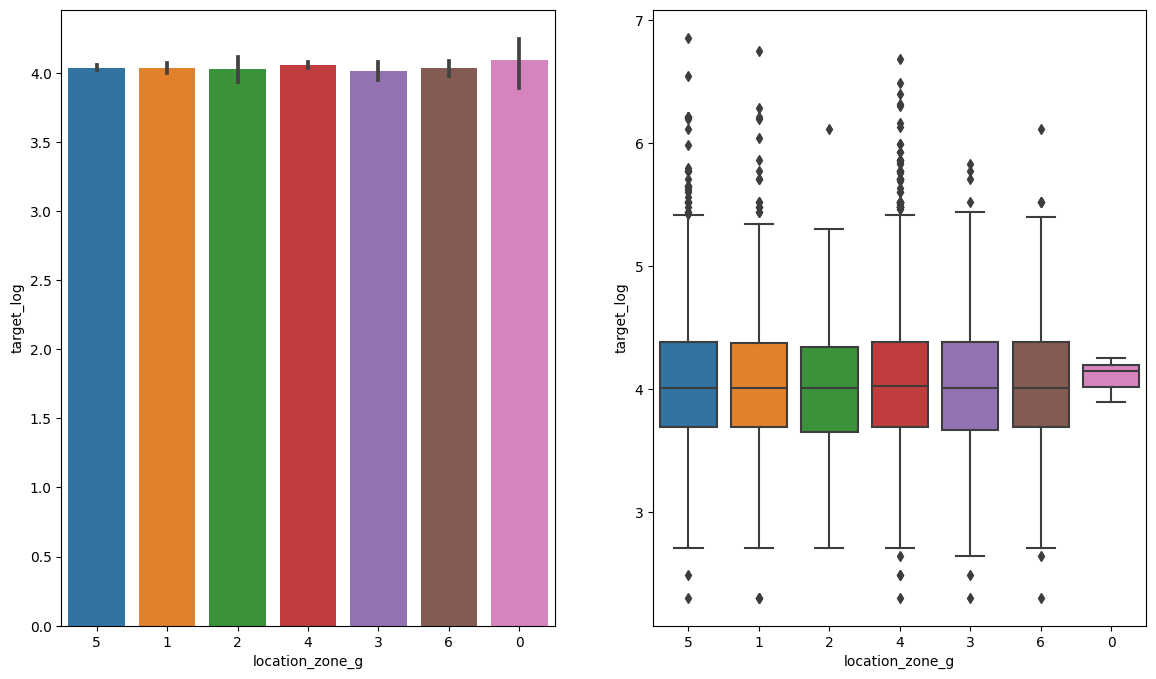

<Figure size 800x800 with 0 Axes>

In [58]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
plt.figure(figsize=(8,8))
sns.barplot(x="location_zone_g", y="target_log", data=df_train_check, ax=ax1)
sns.boxplot(x="location_zone_g", y="target_log", data=df_train_check, ax=ax2)

In [59]:
df_train_check.dtypes

property_id                   int64
property_name                object
property_summary             object
property_space               object
property_desc                object
property_neighborhood        object
property_notes               object
property_transit             object
property_access              object
property_interaction         object
property_rules               object
property_zipcode             object
property_type                object
property_room_type           object
property_max_guests           int64
property_bathrooms          float64
property_bedrooms           float64
property_beds               float64
property_bed_type            object
property_amenities           object
property_sqfeet             float64
property_scraped_at          object
property_last_updated        object
host_id                       int64
host_since                   object
host_location                object
host_about                   object
host_response_time          

For this case, since the number of locations that where created are not that many, and some differences can be observed, all the different categories will be used and features will be created with One Hot Encoding

---
## Check the PCA for the reviews features

In this part we will apply all the feature transformers until the PCA, and apply the PCA separately in order to analyse how many components should be used. There is a need to run the other feature transformers first specially because of the Imputer, Scaler and encoding(the imputer requires numerical data) transformers, which need to be used before the PCA.

In [64]:
pipe2 = Pipeline(steps=[
    ('col_dropper',
     ColumnDropper(
        columns_to_drop=[
            'property_id',
            'property_name',
            'host_id',
            'host_location',
            'host_since',
            'host_nr_listings_total',
            'host_response_time',
            'property_desc',
            'property_last_updated',
            'property_scraped_at',
            'property_zipcode',
            'property_sqfeet', 
            'property_neighborhood',
            'property_notes',
            'property_transit', 
            'property_access',
            'property_interaction',
            'property_rules',
            'reviews_first',
            'reviews_last',
            'property_bed_type',
            'property_space',
            'property_amenities',
            'host_about',
            'property_summary'
            ]
        )
     ),
    ('host_verified_counter',
     HostVerificationsCounter()
     ),
    ('extras_handler',
     ExtrasHandler()
     ),
    ('clust_location',
     GaussianClusterer(
        n_clusters=7,
        features_cluster=['property_lat', 'property_lon'],
        initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ])
        )
     ),
    ('property_type_handler',
     PropertyTypeHandler()
     ),
    ('booking_cancel_handler',
     BookingCancelHandler()
     ),
    ('encoder',
     CustomOneHotEncoder(
        columns=[
            'property_type_new',
            'property_room_type',
            'location_zone_g',
            'booking_cancel_policy'
            ]
        )
     ),
    ('imputer',
     CustomIterativeImputer()
     ),
    ('scaler',
     CustomStandardScaler(
        columns=[
            'property_max_guests',
            'property_bathrooms',
            'property_bedrooms',
            'property_beds',
            'host_response_rate',
            'host_nr_listings',
            'booking_price_covers',
            'booking_min_nights',
            'booking_max_nights',
            'booking_availability_30',
            'booking_availability_60',
            'booking_availability_90',
            'booking_availability_365',
            'reviews_num',
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value',
            'reviews_per_month',
            'count_host_verifications'
        ]
     ))
])

In [65]:
df_train_pca = pipe2.fit_transform(df_train)

In [66]:
pca = PCA()

In [67]:
pca.fit(
    df_train_pca[[
        'reviews_acc',
        'reviews_cleanliness',
        'reviews_checkin',
        'reviews_communication',
        'reviews_location',
        'reviews_value']])

PCA()

In [68]:
pca.explained_variance_ratio_

array([0.59340362, 0.1250195 , 0.11135139, 0.0671081 , 0.05583359,
       0.04728379])

In [69]:
pca.explained_variance_ratio_[:3].sum()

0.8297745075681185

For the PCA, the number of components that will be chosen is 3, as it explains 83% of the variance in the reviews features.

---
## Analysing the Final Dataset

We will apply the final data preprocessing pipeline and verify the data, plotting a correlation heatmap.

In [72]:
pipe3 = pipe = Pipeline(steps=[
    ('col_dropper',
     ColumnDropper(
        columns_to_drop=[
            'property_id',
            'property_name',
            'host_id',
            'host_location',
            'host_since',
            'host_nr_listings_total',
            'host_response_time',
            'property_desc',
            'property_last_updated',
            'property_scraped_at',
            'property_zipcode',
            'property_sqfeet', 
            'property_neighborhood',
            'property_notes',
            'property_transit', 
            'property_access',
            'property_interaction',
            'property_rules',
            'reviews_first',
            'reviews_last',
            'property_bed_type',
            'property_space',
            'property_amenities',
            'host_about',
            'property_summary'
            ]
        )
     ),
    ('host_verified_counter',
     HostVerificationsCounter()
     ),
    ('extras_handler',
     ExtrasHandler()
     ),
    ('clust_location',
     GaussianClusterer(
        n_clusters=7,
        features_cluster=['property_lat', 'property_lon'],
        initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ])
        )
     ),
    ('property_type_handler',
     PropertyTypeHandler()
     ),
    ('booking_cancel_handler',
     BookingCancelHandler()
     ),
    ('encoder',
     CustomOneHotEncoder(
        columns=[
            'property_type_new',
            'property_room_type',
            'location_zone_g',
            'booking_cancel_policy'
            ]
        )
     ),
    ('imputer',
     CustomIterativeImputer()
     ),
    ('scaler',
     CustomStandardScaler(
        columns=[
            'property_max_guests',
            'property_bathrooms',
            'property_bedrooms',
            'property_beds',
            'host_response_rate',
            'host_nr_listings',
            'booking_price_covers',
            'booking_min_nights',
            'booking_max_nights',
            'booking_availability_30',
            'booking_availability_60',
            'booking_availability_90',
            'booking_availability_365',
            'reviews_num',
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value',
            'reviews_per_month',
            'count_host_verifications'
        ]
     )),
    ('pca_reviews',
     PCATransformer(
        n_components=3,
        columns=[
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value'
        ]
     ))
])

In [73]:
df_train_final = pipe3.fit_transform(df_train)

In [74]:
(df_train_final.isna().sum() > 0).sum()

0

<Axes: >

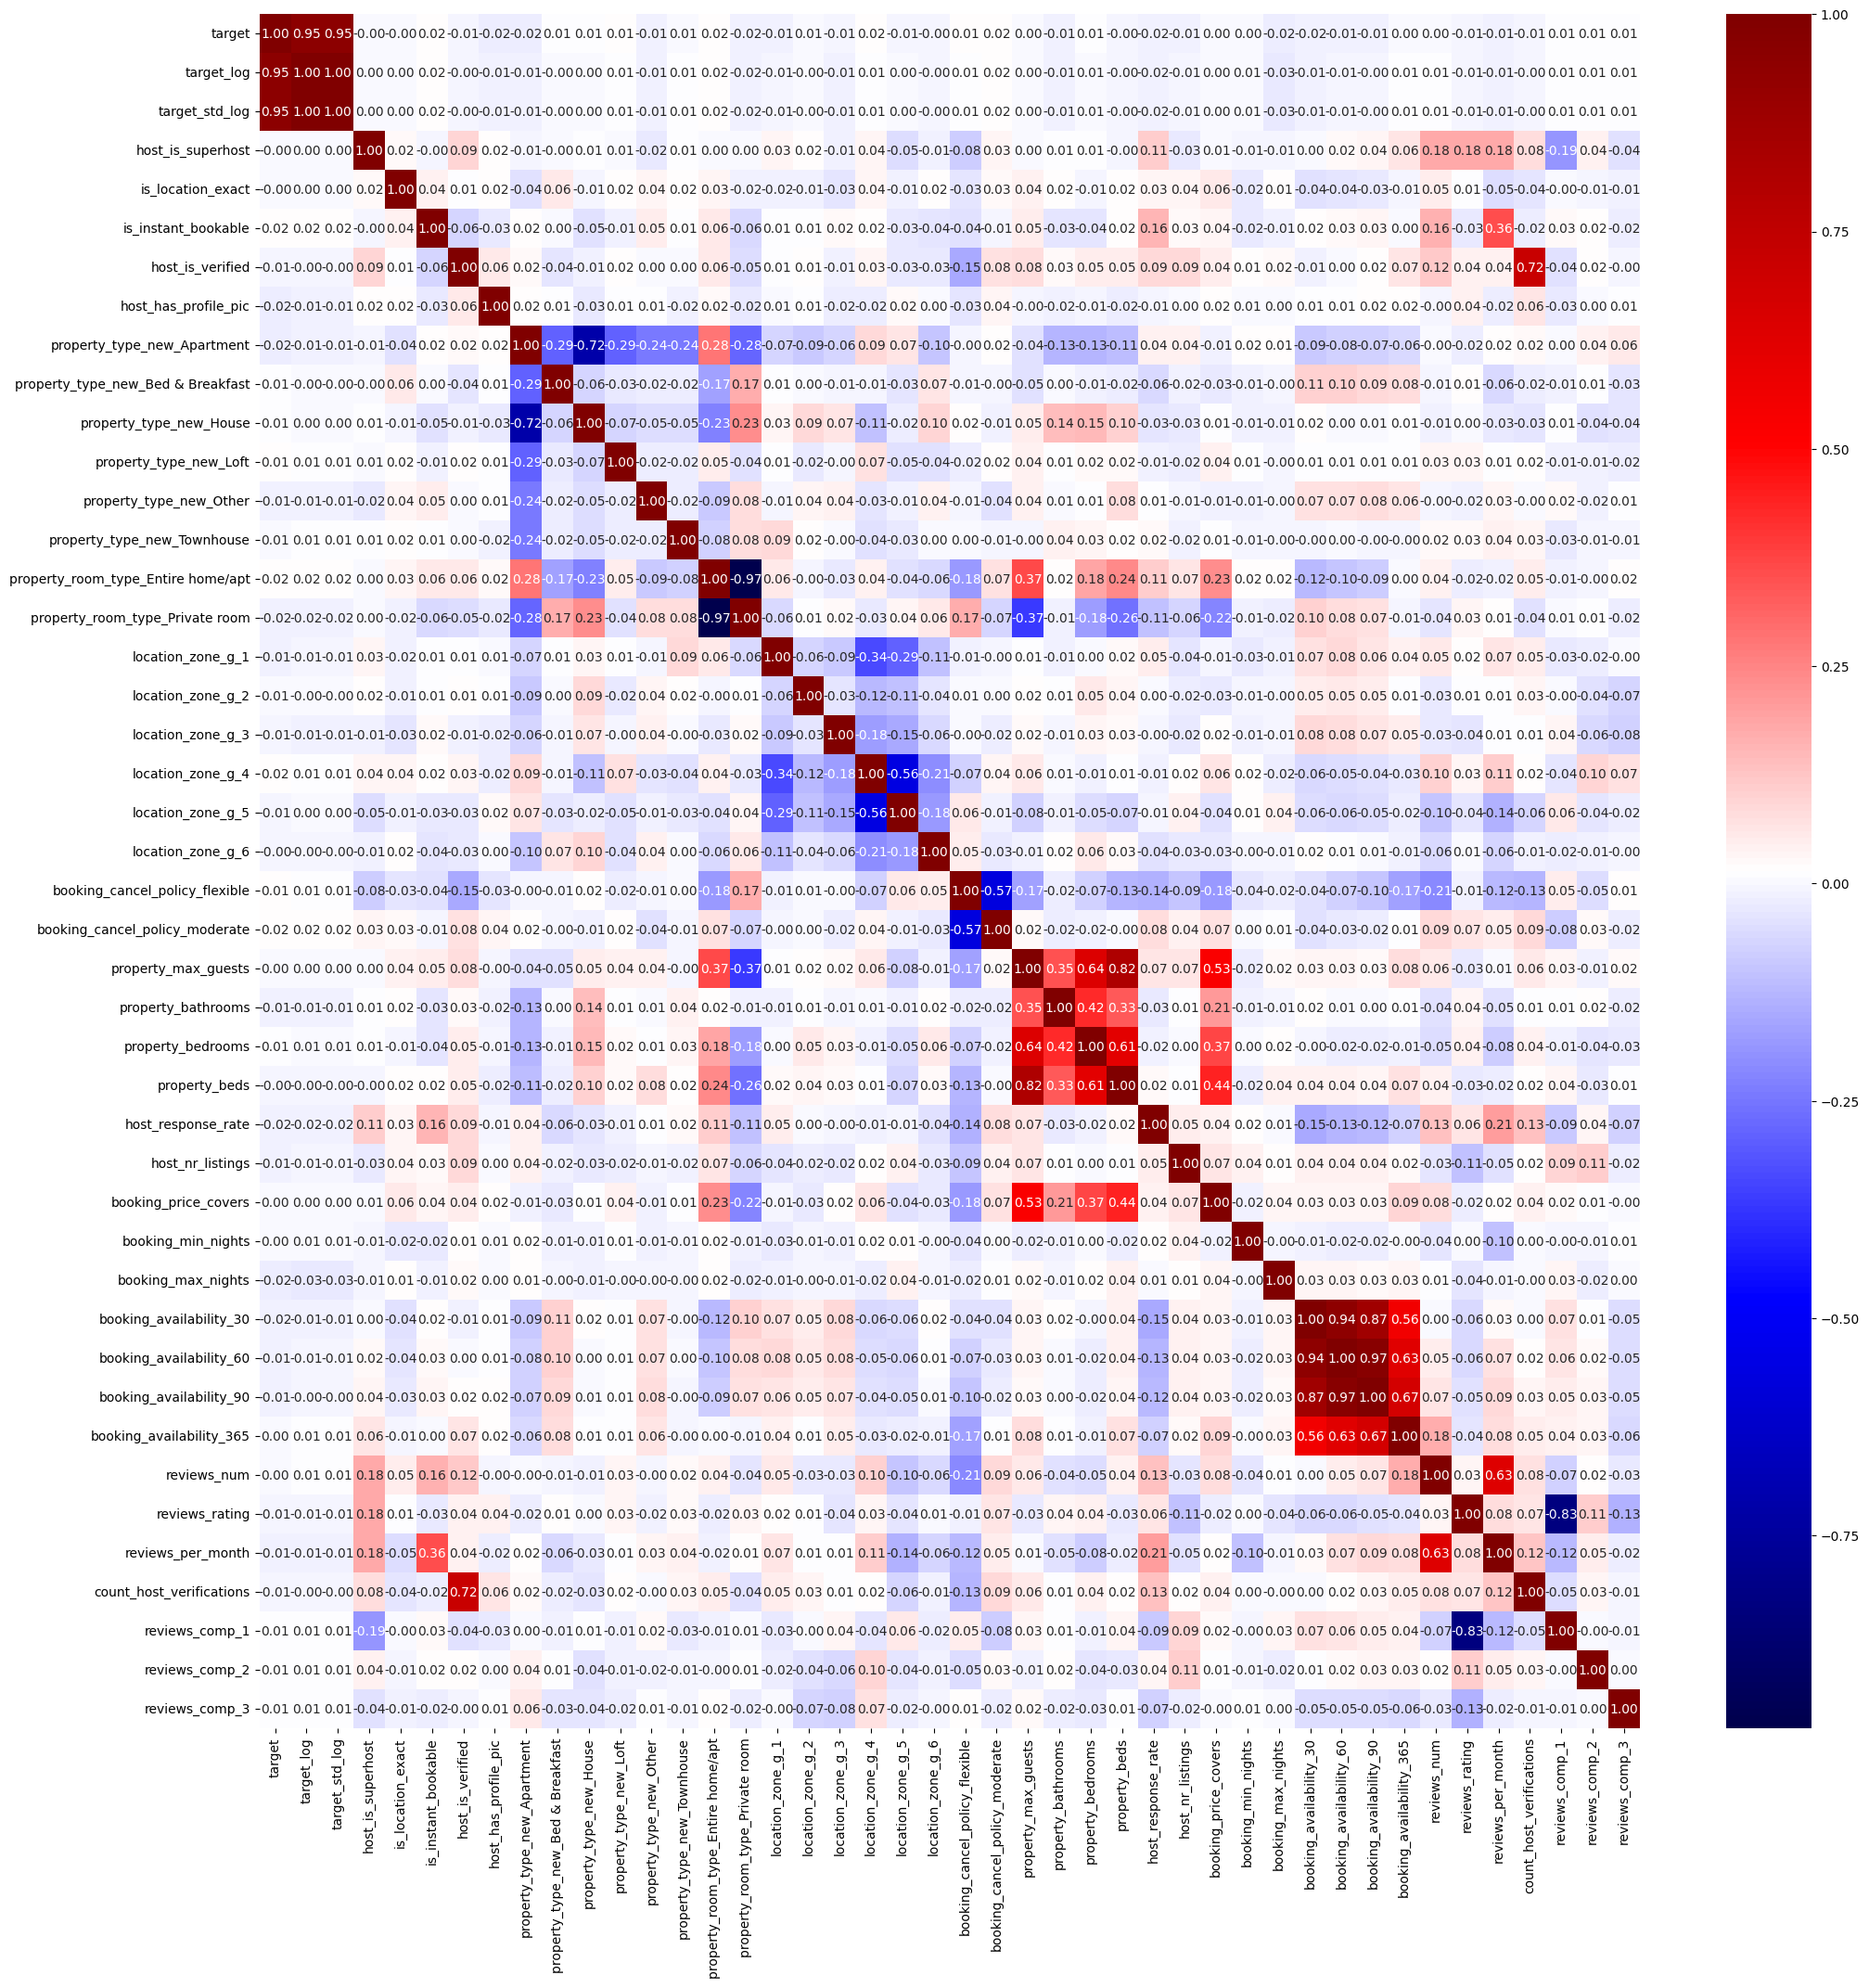

In [75]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train_final[df_train_final.target < 200].corr(), annot=True, fmt=".2f", cmap="seismic")

In [76]:
df_train_final.drop(columns=['target', 'target_std_log'], inplace=True)

In [77]:
df_train_final.columns

Index(['target_log', 'host_is_superhost', 'is_location_exact',
       'is_instant_bookable', 'host_is_verified', 'host_has_profile_pic',
       'property_type_new_Apartment', 'property_type_new_Bed & Breakfast',
       'property_type_new_House', 'property_type_new_Loft',
       'property_type_new_Other', 'property_type_new_Townhouse',
       'property_room_type_Entire home/apt', 'property_room_type_Private room',
       'location_zone_g_1', 'location_zone_g_2', 'location_zone_g_3',
       'location_zone_g_4', 'location_zone_g_5', 'location_zone_g_6',
       'booking_cancel_policy_flexible', 'booking_cancel_policy_moderate',
       'property_max_guests', 'property_bathrooms', 'property_bedrooms',
       'property_beds', 'host_response_rate', 'host_nr_listings',
       'booking_price_covers', 'booking_min_nights', 'booking_max_nights',
       'booking_availability_30', 'booking_availability_60',
       'booking_availability_90', 'booking_availability_365', 'reviews_num',
       'reviews_

In [78]:
iso_forest = IsolationForest()

# Columns to check outliers in the price
cols = [
    'property_max_guests',
    'property_beds',
    'property_bathrooms',
    'property_room_type_Entire home/apt',
    'property_room_type_Private room',
    'is_instant_bookable',
    'target_log'
]


pred_outlier = iso_forest.fit_predict(df_train_final[cols])

In [79]:
df_train_final['pred_outlier'] = pred_outlier

In [80]:
df_train_final['pred_outlier'].value_counts()

 1    5170
-1    1325
Name: pred_outlier, dtype: int64

<Axes: >

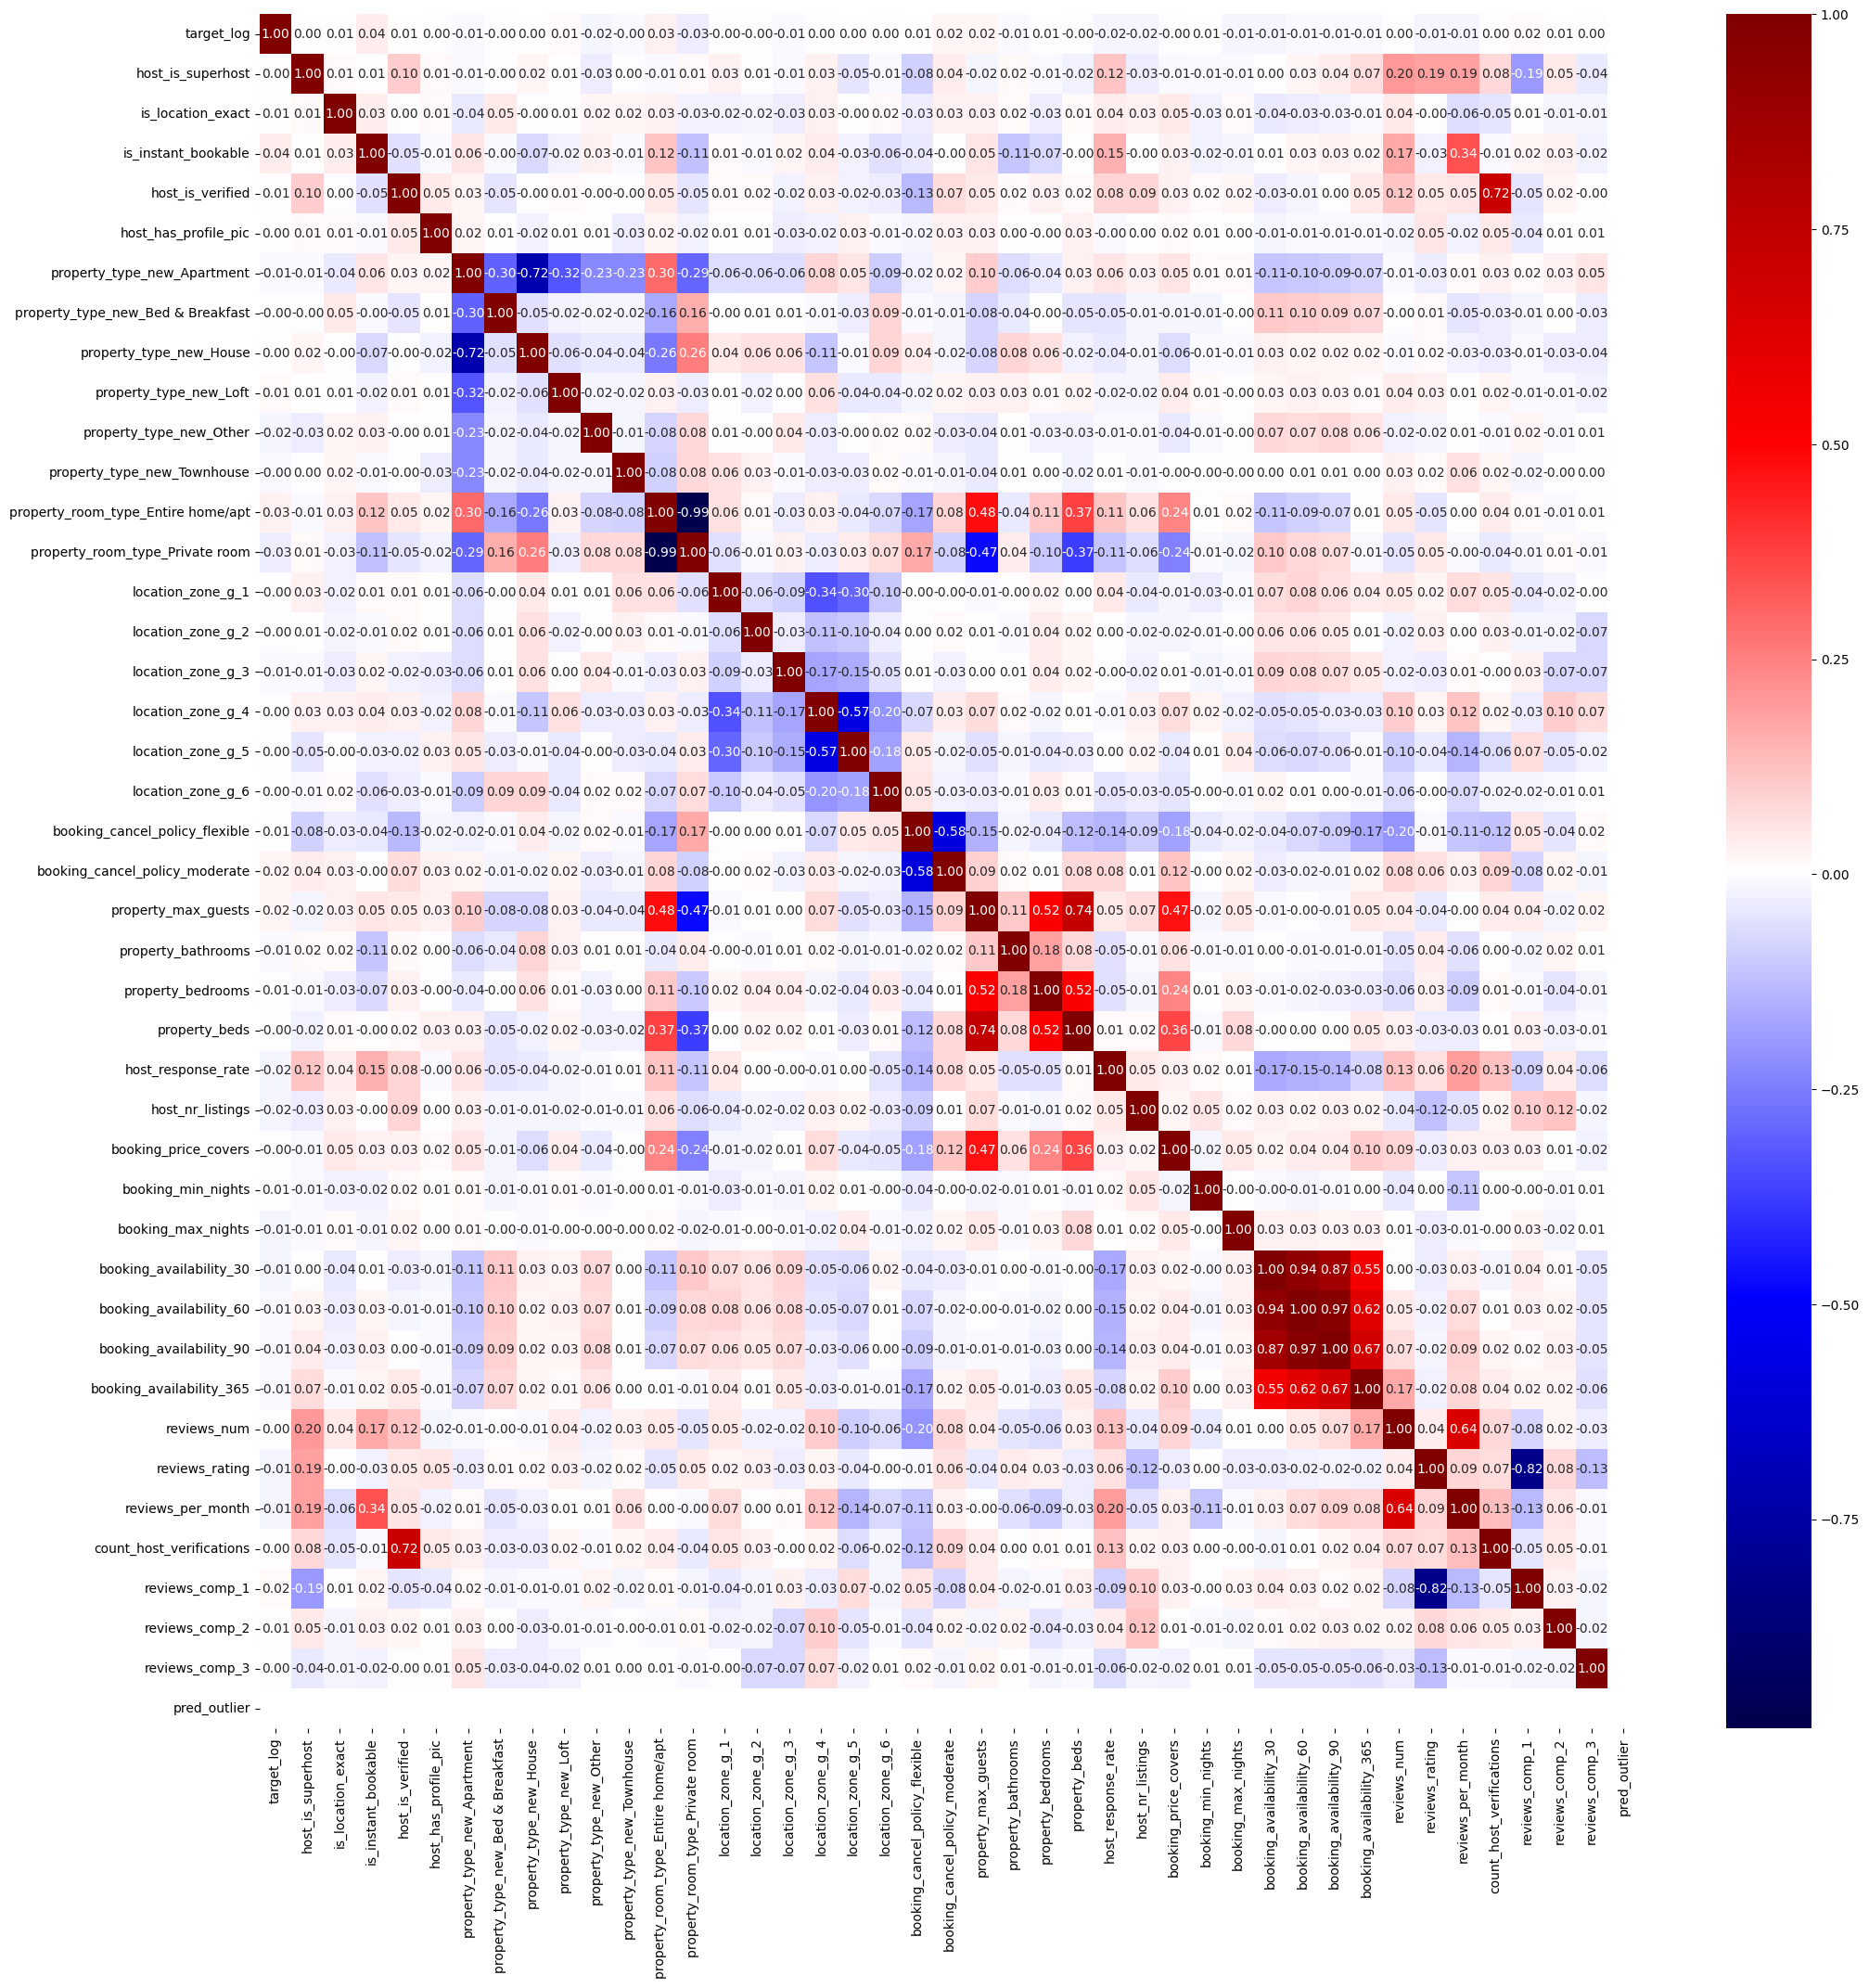

In [85]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train_final[df_train_final.pred_outlier == 1].corr(), annot=True, fmt=".2f", cmap="seismic")